In [5]:
import warnings
warnings.filterwarnings("ignore")


#standard ds imports
import numpy as np
import pandas as pd

#stats and plotting
from pydataset import data
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Overview

### Null vs Alternative Hypothesis
- $H_0$: no difference or no effect
- $H_a$: there is a difference or effect
- wether Ha is ≠, <,>, determines one-tailed vs. two-tailed test
    - < or > == one-tailed
    - ≠ == two-tailed
    
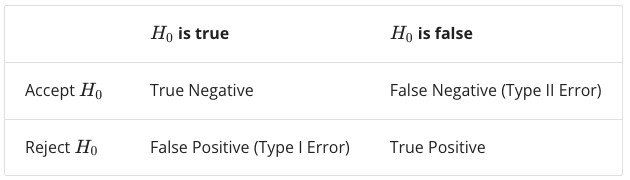

- A **type I** error is when we reject the null hypothesis, but, in reality, the null hypothesis is true.
- A **type II** error is when we fail to reject the null hypothesis when it is actually false.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

##### 1. Has the network latency gone up since we switched internet servive providers?

 - $H_0$ : There is no difference in network latency due to a swtich in internet servie providers.
- $H_a$ : The is a difference in network latency due to a switch in internet service providers. 
    
    - True positive: We rejcet the $H_0$, there is a difference between latency and providers.
    - False positive (Type I): We reject the $H_0$, there is a diffence betwen latency and providers, but, in reality, there is no difference (null is true). 
    - True Negative: We fail to reject the $H_0$, there is no difference between latency and providers.
    - False Negative (Type II): We fail to reject the $H_0$, there is no difference between latency and providers, however this is false (there is a difference). 

##### 2. Is the website redesign any good?

- $H_0$: There is no difference between the old and new website design.
- $H_a$: There is a difference between the old and new website design. 
    - True positve: We reject the $H_0$, the designs are different. 
    - False positive (Type I): We reject the $H_0$, the designs are different, but, in reality, there is no difference (null is true). 
    - True negative: We fail to reject the $H_0$, there is no  difference in the website desing.
    - False negative (Type II): We fail to reject the $H_0$, we think the designs are not different, however this is false (they are differnt).

##### 3. Is our television ad driving more sales?

- $H_0$: The ad did not impact sales.
- $H_a$: The ad did impact sales. 
    - True positive: We reject the $H_0$, there is a impact from the ad.
    - False positive(Type I): We reject the $H_0$, there is a impact from the ad, but, in reality, there is no difference(null is true).
    - True negative: We fail to reject the $H_0$, there is no impact from the ad. 
    - False negative (Type II): We fail to reject the $H_0$, there is no impact from the ad, however this is false (there is an impact).

# Comparing of Groups

Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.
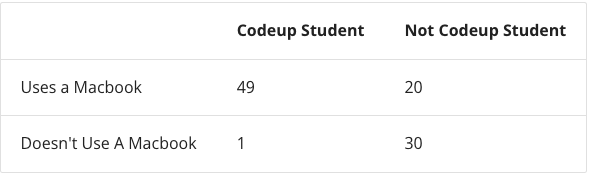

$H_0$: There is no association between being a Codeup Student and using a Macbook. <br>
$H_a$: There is an association between being a Codeup Student and using a Macbook.

In [6]:
#making the table
data = {
    'Codeup_Student': [49, 1],
    'Not_Codeup_Student': [20, 30]
}

df = pd.DataFrame(data, index=['Uses_a_Macbook', "Doesn't_Use_A_Macbook"])

print(df)

                       Codeup_Student  Not_Codeup_Student
Uses_a_Macbook                     49                  20
Doesn't_Use_A_Macbook               1                  30


In [7]:
# prettier table:
observed = [[49,20],[1,30]]
observed = pd.DataFrame(observed, columns = ['codeup_student','not_codeup_student'], index = ['macbook', 'no_macbook'])
observed

,codeup_student,not_codeup_student
macbook,49,20
no_macbook,1,30


In [8]:
chi2, p, defg, expected = stats.chi2_contingency(df)

In [9]:
print(f'''Observed:
{df.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[49 20]
 [ 1 30]]

Expected:
[[34 34]
 [15 15]]
________________

ꭓ² = 36.6526
p  = 1.4116760526193828e-09


In [10]:
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis, using a macbook and being at codeup are not indepent of each other.')
else:
    print('We fail to reject the null, using a mackbook and being a codeip student are indepent of each other.')

We reject the null hypothesis, using a macbook and being at codeup are not indepent of each other.


### Question 2: Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a $chi^2$ test of independence.
- State your conclusion


In [11]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
#clean up for understanding:
mpg = mpg.rename(columns = {'cty':'city', 'hwy': 'highway', 'trans': 'transmission'})
mpg.head()

,manufacturer,model,displ,year,cyl,transmission,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [13]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   transmission  234 non-null    object 
 6   drv           234 non-null    object 
 7   city          234 non-null    int64  
 8   highway       234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [14]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [15]:
# look at categorical data
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
transmission    10
drv              3
city            21
highway         27
fl               5
class            7
dtype: int64

#### a. State your null and alternative hypotheses.
- $H_0$ = There is no difference between manufacuturer and transmission.
- $H_a$ = There is a difference between manufacturere and transmission.

In [16]:
null = 'There is no difference between manufacturer and tranmission'

#### b. State your alpha

In [17]:
alpha = 0.05

#### b. Perform a  𝑐ℎ𝑖2 test of independence.

In [18]:
observed_cars = pd.crosstab(mpg.manufacturer, mpg.transmission)
observed_cars

transmission,auto(av),auto(l3),auto(l4),auto(l5),auto(l6),auto(s4),auto(s5),auto(s6),manual(m5),manual(m6)
manufacturer,,,,,,,,,,
audi,2,0,0,5,0,0,0,4,4,3
chevrolet,0,0,14,0,0,0,0,2,0,3
dodge,0,1,16,11,2,0,0,0,3,4
ford,0,0,10,5,2,0,0,0,7,1
honda,0,0,2,2,0,0,0,0,4,1
hyundai,0,0,6,1,0,0,0,0,6,1
jeep,0,0,2,6,0,0,0,0,0,0
land rover,0,0,2,0,0,0,0,2,0,0
lincoln,0,0,2,0,1,0,0,0,0,0


In [19]:
chi2, p, defg, expected = stats.chi2_contingency(observed_cars)

In [20]:
print(f'''Observed:
{observed_cars.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[ 2  0  0  5  0  0  0  4  4  3]
 [ 0  0 14  0  0  0  0  2  0  3]
 [ 0  1 16 11  2  0  0  0  3  4]
 [ 0  0 10  5  2  0  0  0  7  1]
 [ 0  0  2  2  0  0  0  0  4  1]
 [ 0  0  6  1  0  0  0  0  6  1]
 [ 0  0  2  6  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  0  0]
 [ 0  0  2  0  1  0  0  0  0  0]
 [ 0  0  1  2  1  0  0  0  0  0]
 [ 3  0  3  1  0  0  1  0  3  2]
 [ 0  0  4  0  0  1  0  0  0  0]
 [ 0  0  5  0  0  2  0  0  7  0]
 [ 0  1 11  4  0  0  2  2 13  1]
 [ 0  0  5  2  0  0  0  6 11  3]]

Expected:
[[ 0  0  6  3  0  0  0  1  4  1]
 [ 0  0  6  3  0  0  0  1  4  1]
 [ 0  0 13  6  0  0  0  2  9  3]
 [ 0  0  8  4  0  0  0  1  6  2]
 [ 0  0  3  1  0  0  0  0  2  0]
 [ 0  0  4  2  0  0  0  0  3  1]
 [ 0  0  2  1  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  4  2  0  0  0  0  3  1]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  4  2  0  0  0  0  3  1]
 [ 0  0 12  5  0  0  0  2  8  2]
 [ 0  0  9  4  0  0  

In [21]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

We reject H₀:There is no difference between manufacturer and tranmission


### Trying it with manufacturer and class

In [22]:
null2 = 'Class is indepented of manufacturer'

In [23]:
observed3 = pd.crosstab(mpg['class'], mpg['manufacturer'])
observed3

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [24]:
chi2, p, defg, expected = stats.chi2_contingency(observed3)

In [25]:
print(f'''Observed:
{observed3.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  2  0  4 12 14]
 [ 3  5  0  0  0  7  0  0  0  0  7  5  0  7  7]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  7  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  9  9  7  0  0  0  0  0  0  4  0  6]
 [ 0  9  7  9  0  0  8  4  3  4  4  0  6  8  0]]

Expected:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 3 7 5 1 2 1 0 0 0 2 1 2 6 5]
 [3 3 6 4 1 2 1 0 0 0 2 0 2 5 4]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 1]
 [2 2 5 3 1 1 1 0 0 0 1 0 1 4 3]
 [2 2 5 3 1 2 1 0 0 0 1 0 2 5 4]
 [4 5 9 6 2 3 2 1 0 1 3 1 3 9 7]]
________________

ꭓ² = 464.3721
p  = 5.267718408816259e-54


In [26]:
if p < alpha:
    print(f'We reject H₀:{null2}')
else:
    print(f'we fail to reject H₀:{null2}')

We reject H₀:Class is indepented of manufacturer


### Class Review

In [27]:
from pydataset import data
#import data from pydataset
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [28]:
#look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [29]:
#use .nunique to see which columns have categorical variables
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [30]:
#look at year data
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [31]:
#look at cyl data
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [32]:
#H0: There is no association between model year and cylinder.

#Ha: There is an association between model year and cylinder.

In [33]:
null = "There is no association between model year and cylinder."

In [34]:
observedm = pd.crosstab(df.year, df.cyl)
observedm

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [35]:
chi2, p, degf, expected = stats.chi2_contingency(observedm)

In [36]:
print(f'''Observed:
{observedm.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[45  0 45 27]
 [36  4 34 43]]

Expected:
[[40  2 39 35]
 [40  2 39 35]]
________________

ꭓ² = 10.1888
p  = 0.01702768537665195


In [37]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We fail to reject H₀:{null}')

We reject H₀:There is no association between model year and cylinder.


### Question 3: Use the data from the employees database to answer these questions:

#### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: There is no association between employee gender and working in sales or marketing. <br>
$H_a$: There is an association between employee gender and working in sales or marketing.

In [38]:
null_employees = 'gender is independent on whether an employee works in sales or marketing'

In [39]:
import env

In [40]:
url = env.get_db_url('employees')

In [41]:
query = '''
select 
	e.emp_no,
    e.gender,
    d.dept_name,
    de.to_date
    
from 
	employees as e
    join dept_emp as de
		using(emp_no)
	join departments as d
		using(dept_no)

Where 
	de.to_date > curdate() 
    and
    d.dept_name in ('Marketing', 'Sales');'''

In [42]:
employees = pd.read_sql(query, url)
employees

,emp_no,gender,dept_name,to_date
0,10017,F,Marketing,9999-01-01
1,10058,M,Marketing,9999-01-01
2,10140,F,Marketing,9999-01-01
3,10228,F,Marketing,9999-01-01
4,10239,F,Marketing,9999-01-01
...,...,...,...,...
52538,499966,F,Sales,9999-01-01
52539,499976,M,Sales,9999-01-01
52540,499980,M,Sales,9999-01-01
52541,499986,F,Sales,9999-01-01


In [43]:
employees.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [44]:
employees.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [45]:
observed4 = pd.crosstab(employees.gender, employees.dept_name)
observed4

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [46]:
pd.crosstab(employees.gender, employees.dept_name, normalize = True)

dept_name,Marketing,Sales
gender,,
F,0.111604,0.285461
M,0.170870,0.432065


In [47]:
chi2, p, defg, expected = stats.chi2_contingency(observed4)

In [48]:
print(f'''Observed:
{observed4.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[ 5864 14999]
 [ 8978 22702]]

Expected:
[[ 5893 14969]
 [ 8948 22731]]
________________

ꭓ² = 0.3240
p  = 0.5691938610810126


In [49]:
if p < alpha:
    print(f'We reject H₀:{null_employees}')
else:
    print(f'we fail to reject H₀:{null_employees}')

we fail to reject H₀:gender is independent on whether an employee works in sales or marketing


##### b.Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: There is no association between employee gender and being a manager. <br>
$H_a$: There is an association between employee gender and being a manager.

In [50]:
null = 'There is no association between employee gender and being a manager'

In [51]:
query = '''
SELECT emp_no, gender, dept_no
FROM employees
    LEFT JOIN dept_manager
        using(emp_no)
'''

In [52]:
employees2 = pd.read_sql(query, url)
employees2

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [53]:
# fill in the nulls
employees2.dept_no = employees2.dept_no.fillna('not_mngr')

In [54]:
employees2.dept_no.value_counts()

not_mngr    300000
d004             4
d006             4
d009             4
d001             2
d002             2
d003             2
d005             2
d007             2
d008             2
Name: dept_no, dtype: int64

In [55]:
# make a new column

np.where(employees2.dept_no != "not_mngr","manager","not_manager")

array(['not_manager', 'not_manager', 'not_manager', ..., 'not_manager',
       'not_manager', 'not_manager'], dtype='<U11')

In [56]:
employees2['manager_status'] = np.where(employees2.dept_no != "not_mngr","manager","not_manager")

In [57]:
employees2

,emp_no,gender,dept_no,manager_status
0,10001,M,not_mngr,not_manager
1,10002,F,not_mngr,not_manager
2,10003,M,not_mngr,not_manager
3,10004,M,not_mngr,not_manager
4,10005,M,not_mngr,not_manager
...,...,...,...,...
300019,499995,F,not_mngr,not_manager
300020,499996,M,not_mngr,not_manager
300021,499997,M,not_mngr,not_manager
300022,499998,M,not_mngr,not_manager


In [58]:
observed5 = pd.crosstab(employees2.gender, employees2.manager_status)
observed5

manager_status,manager,not_manager
gender,,
F,13,120038
M,11,179962


In [59]:
chi2, p, defg, expected = stats.chi2_contingency(observed5)

In [60]:
print(f'''Observed:
{observed5.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[    13 120038]
 [    11 179962]]

Expected:
[[     9 120041]
 [    14 179958]]
________________

ꭓ² = 1.4567
p  = 0.22745818732810363


In [61]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

we fail to reject H₀:There is no association between employee gender and being a manager


# Correlation

##### Question 2. 
Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

#### a. Does tenure correlate with monthly charges?

$H_0$: There is no correlation between tenure and monthly charges. <br>
$H_a$: There is an correlation between tenure and monthly charges.

In [62]:
import env

In [63]:
url_telco = env.get_db_url('telco_churn')

In [64]:
pd.read_sql('''show tables ''', url_telco)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


In [65]:
#what table contains tenure
customers = pd.read_sql('select * from customers', url_telco)
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [66]:
#what table contains montly charges
internet_service_type = pd.read_sql('select * from internet_service_types', url_telco)
internet_service_type

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [67]:
# merge the dataframes
combined = customers.merge(internet_service_type, on = 'internet_service_type_id', how='inner')
combined

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,DSL
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No,DSL
3,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,1,Yes,1,48.20,340.35,No,DSL
4,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9970-QBCDA,Female,0,No,No,6,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,4,19.70,129.55,No,None
7039,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,Yes,3,19.25,1372.9,No,None
7040,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,4,19.75,856.5,No,None
7041,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No,None


In [68]:
# only want these two columns
monthly = combined[['tenure','monthly_charges']]
monthly

,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,9,69.40
3,7,48.20
4,65,90.45
...,...,...
7038,6,19.70
7039,67,19.25
7040,46,19.75
7041,1,18.90


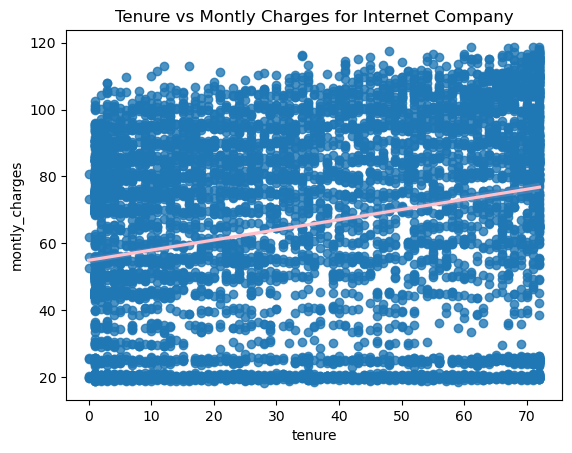

In [69]:
# plot the data:
sns.regplot(data = monthly, x= monthly.tenure, y = monthly.monthly_charges, line_kws={'color':'pink'})

plt.title("Tenure vs Montly Charges for Internet Company")
plt.xlabel('tenure')
plt.ylabel('montly_charges')
plt.show()

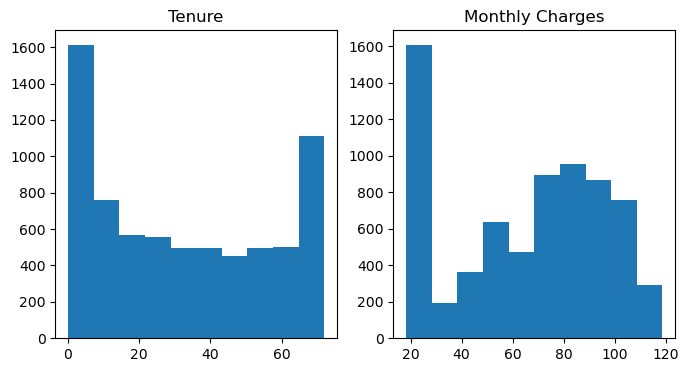

In [70]:
#test for assumptions
x = monthly.tenure
y = monthly.monthly_charges
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].hist(x)
axs[0].set_title('Tenure')

axs[1].hist(y)
axs[1].set_title('Monthly Charges')

plt.show()

In [71]:
r, p = stats.shapiro(monthly.tenure)
r, p

(0.9037512540817261, 0.0)

In [72]:
eval_dist(r, p)

The data is NOT normally distributed


In [73]:
r, p = stats.shapiro(monthly.monthly_charges)
r, p

(0.9208889007568359, 0.0)

In [74]:
eval_dist(r, p)

The data is NOT normally distributed


In [75]:
alpha = 0.05
r, p = stats.pearsonr(x,y)
print('r=', r)
print('p=', p)

r= 0.24789985628615221
p= 4.094044991478557e-99


In [76]:
#evaluate p-value
if p < alpha:
    print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of 0.247900.
P-value: 4.094044991478557e-99


In [77]:
r, p = stats.spearmanr(x,y)
print('r=', r)
print('p=', p)

r= 0.27641678933130215
p= 1.0271266876409408e-123


In [78]:
#evaluate p-value
if p < alpha:
    print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of 0.276417.
P-value: 1.0271266876409408e-123


#### b. Does tenure correlate with total charges?

$H_0$: There is no correlation between tenure and total charges. <br>
$H_a$: There is an correlation between tenure and total charges.

In [79]:
#customers

In [80]:
total = combined[['tenure', 'total_charges']]
total

,tenure,total_charges
0,9,593.3
1,9,542.4
2,9,571.45
3,7,340.35
4,65,5957.9
...,...,...
7038,6,129.55
7039,67,1372.9
7040,46,856.5
7041,1,18.9


In [81]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 165.1+ KB


In [82]:
# need to remove nulls
cleaned = total.replace(r'\s+',np.nan, regex=True)
cleaned.total_charges.sort_values()

1484     100.2
3412    100.25
5912    100.35
1899     100.4
4690     100.8
         ...  
5974       NaN
6000       NaN
6019       NaN
6188       NaN
6694       NaN
Name: total_charges, Length: 7043, dtype: object

In [83]:
cleaned.fillna('0', inplace=True)
cleaned.sort_values(by = 'total_charges')

,tenure,total_charges
630,0,0
6000,0,0
1052,0,0
1366,0,0
6019,0,0
...,...,...
6791,51,997.75
6457,55,998.1
4270,13,999.45
3822,12,999.8


In [84]:
cleaned['total_charges'] = cleaned['total_charges'].astype(float)
cleaned

,tenure,total_charges
0,9,593.30
1,9,542.40
2,9,571.45
3,7,340.35
4,65,5957.90
...,...,...
7038,6,129.55
7039,67,1372.90
7040,46,856.50
7041,1,18.90


In [85]:
# another way to replace the zeros: 
#ttl_charges_df['total_charges'].str.replace(" ", "0").sort_values()
#convert empty space to '0'
#ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(" ", "0").astype('float')

In [86]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 165.1 KB


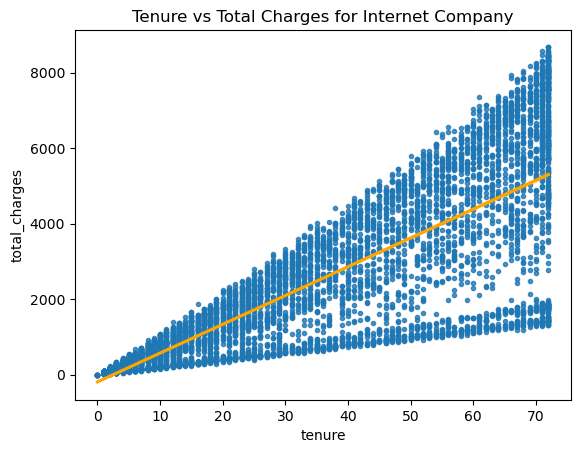

In [87]:
# plot the data:
sns.regplot(data = cleaned, x= cleaned.tenure, y = cleaned.total_charges, marker='.', line_kws=dict(color='orange'))

plt.title("Tenure vs Total Charges for Internet Company")
plt.xlabel('tenure')
plt.ylabel('total_charges')
plt.show()

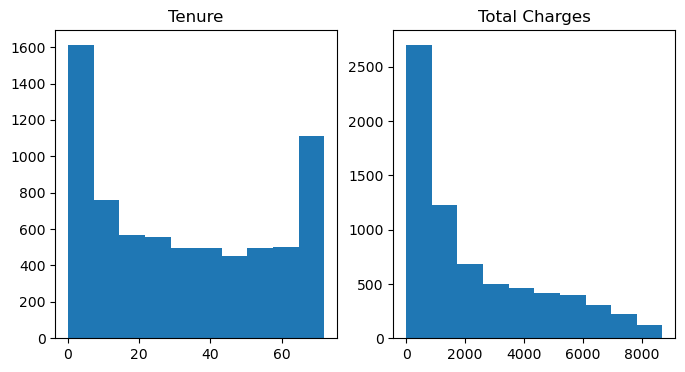

In [88]:
#test for assumptions
x = cleaned.tenure
y = cleaned.total_charges
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].hist(x)
axs[0].set_title('Tenure')

axs[1].hist(y)
axs[1].set_title('Total Charges')

plt.show()

In [89]:
r, p = stats.shapiro(cleaned.tenure)
r, p

(0.9037512540817261, 0.0)

In [90]:
eval_dist(r, p)

The data is NOT normally distributed


In [91]:
r, p = stats.shapiro(cleaned.total_charges)
r, p

(0.8601521253585815, 0.0)

In [92]:
eval_dist(r, p)

The data is NOT normally distributed


In [93]:
alpha = 0.05
r, p = stats.spearmanr(x,y)
print('r=', r)
print('p=', p)

r= 0.8896957900597577
p= 0.0


In [94]:
if p < alpha:
    print(f"""We reject H₀, there appears to be a monotonic relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a monotonic relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a monotonic relationship with a Correlation Coefficient of 0.889696.
P-value: 0.0


#### c. Does tenure correlate of monthly_cost with phone and internet service?

In [95]:
combined

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,DSL
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No,DSL
3,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,1,Yes,1,48.20,340.35,No,DSL
4,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9970-QBCDA,Female,0,No,No,6,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,4,19.70,129.55,No,None
7039,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,Yes,3,19.25,1372.9,No,None
7040,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,4,19.75,856.5,No,None
7041,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No,None


In [96]:
phone_and_internet = combined[['tenure','phone_service','internet_service_type', 'monthly_charges']]
phone_and_internet

,tenure,phone_service,internet_service_type,monthly_charges
0,9,Yes,DSL,65.60
1,9,Yes,DSL,59.90
2,9,Yes,DSL,69.40
3,7,Yes,DSL,48.20
4,65,Yes,DSL,90.45
...,...,...,...,...
7038,6,Yes,None,19.70
7039,67,Yes,None,19.25
7040,46,Yes,None,19.75
7041,1,Yes,None,18.90


In [97]:
phone_and_internet.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [98]:
phone_and_internet.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [99]:
unique_values = internet_service_type['internet_service_type'].unique()
unique_values

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [100]:
phone_and_internet['phone_service'].unique()

array(['Yes', 'No'], dtype=object)

In [101]:
phone_and_internet['phone_and_internet'] = phone_and_internet['phone_and_internet'] = phone_and_internet.apply(lambda row: 'Yes' if ('DSL' in row['internet_service_type']) and (row['phone_service'] == 'Yes') else 'No', axis=1)
#np.where((phone_and_internet['phone_service'] == 'yes') & (phone_and_internet['internet_service_type'] == 'None'), 'Both Services', 'No')


In [102]:
phone_and_internet

,tenure,phone_service,internet_service_type,monthly_charges,phone_and_internet
0,9,Yes,DSL,65.60,Yes
1,9,Yes,DSL,59.90,Yes
2,9,Yes,DSL,69.40,Yes
3,7,Yes,DSL,48.20,Yes
4,65,Yes,DSL,90.45,Yes
...,...,...,...,...,...
7038,6,Yes,None,19.70,No
7039,67,Yes,None,19.25,No
7040,46,Yes,None,19.75,No
7041,1,Yes,None,18.90,No


In [103]:
phone_and_internet['p_i'] = (phone_and_internet['internet_service_type'].str.contains('DSL')) & (phone_and_internet['phone_service'] == 'Yes')
phone_and_internet

,tenure,phone_service,internet_service_type,monthly_charges,phone_and_internet,p_i
0,9,Yes,DSL,65.60,Yes,True
1,9,Yes,DSL,59.90,Yes,True
2,9,Yes,DSL,69.40,Yes,True
3,7,Yes,DSL,48.20,Yes,True
4,65,Yes,DSL,90.45,Yes,True
...,...,...,...,...,...,...
7038,6,Yes,None,19.70,No,False
7039,67,Yes,None,19.25,No,False
7040,46,Yes,None,19.75,No,False
7041,1,Yes,None,18.90,No,False


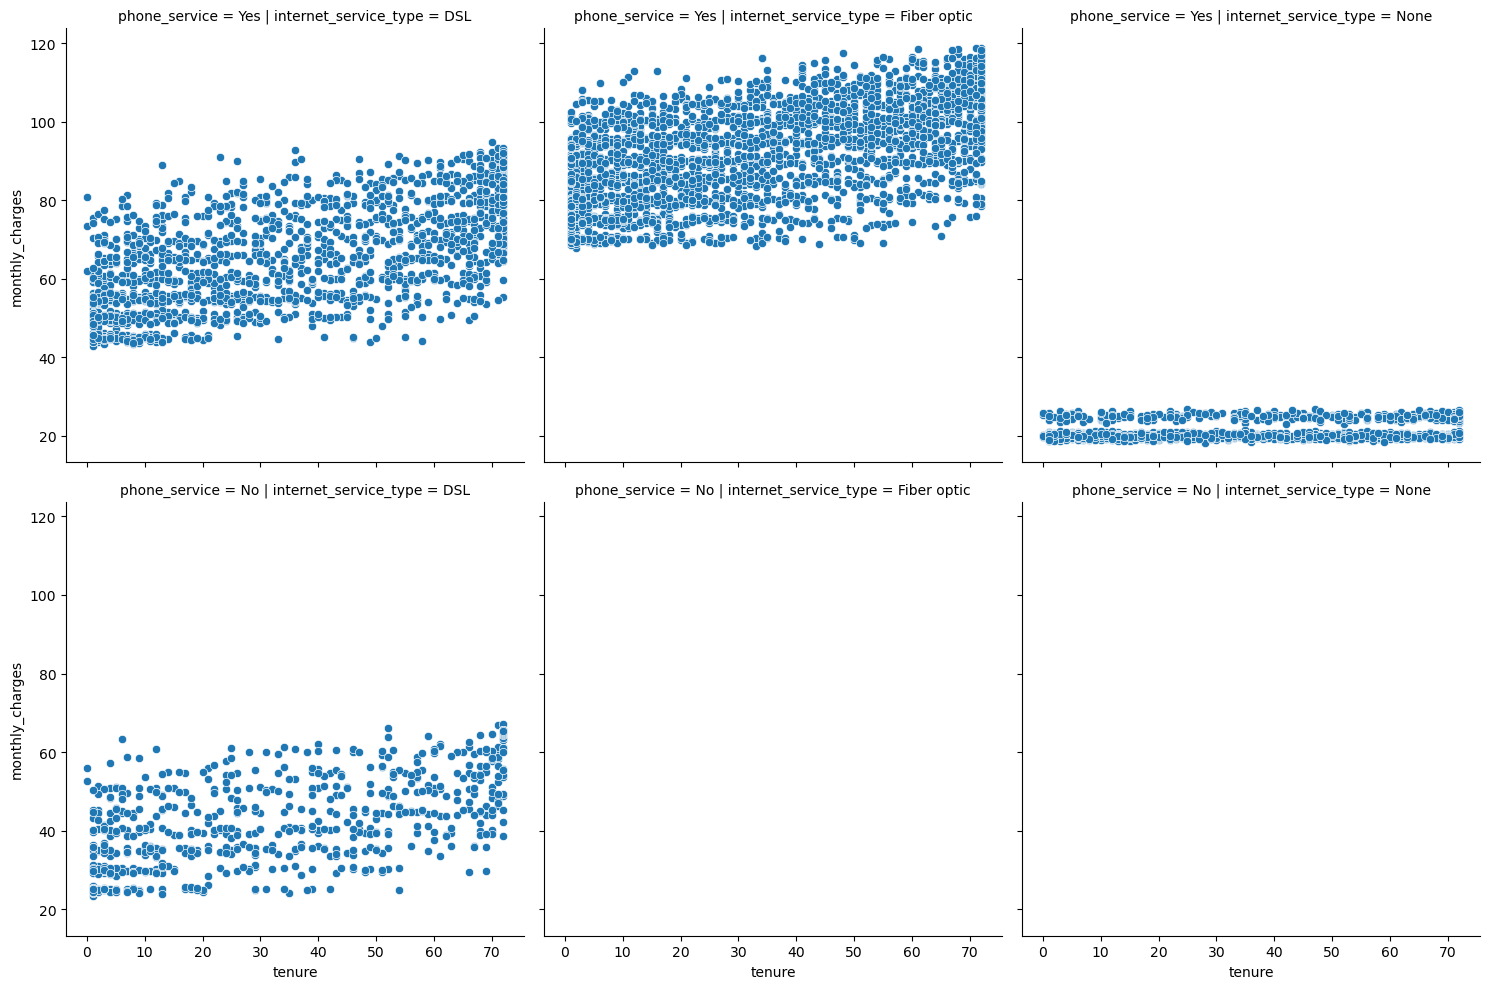

In [104]:
sns.relplot(data=phone_and_internet, x="tenure", y="monthly_charges", col="internet_service_type", row = 'phone_service')
plt.show()

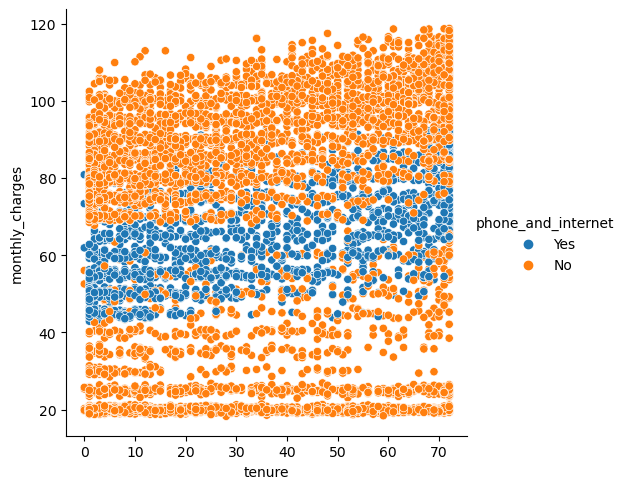

In [105]:
sns.relplot(data=phone_and_internet, x="tenure", y="monthly_charges", hue='phone_and_internet')
plt.show()

## 3. Use employees database.

a. Is there a relationship between how long an employee has been with the company and their salary?

In [106]:
query = """
select * 
from (
	select 
		e.emp_no
		,s.salary
		,e.hire_date
		,CASE WHEN s.to_date = '9999-01-01'
			THEN (select MAX(to_date) from salaries where to_date!='9999-01-01') -- this outputs the max to_date of 8-1-02
			ELSE s.to_date
			END AS to_date
		-- partition by columns that create unique observations
		,row_number() over(partition by e.emp_no, e.hire_date order by s.to_date DESC) as rn
	from employees e 
	join salaries s  on s.emp_no = e.emp_no) base
where base.rn = 1;
"""

In [107]:
emp_url = env.get_db_url('employees')
df = pd.read_sql(query, emp_url)

In [108]:
df.head()

,emp_no,salary,hire_date,to_date,rn
0,10001,88958,1986-06-26,2002-08-01,1
1,10002,72527,1985-11-21,2002-08-01,1
2,10003,43311,1986-08-28,2002-08-01,1
3,10004,74057,1986-12-01,2002-08-01,1
4,10005,94692,1989-09-12,2002-08-01,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   hire_date  300024 non-null  object
 3   to_date    300024 non-null  object
 4   rn         300024 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.4+ MB


### a. Is there a relationship between how long an employee has been with the company and their salary?

In [110]:
# H0 = There is no correlation between tenure and salary
#Ha = There is a correlation between tenure and salary

In [111]:
(df.to_date - df.hire_date)

0        5880 days
1        6097 days
2        5817 days
3        5722 days
4        4706 days
            ...   
300019   3488 days
300020   4326 days
300021   5946 days
300022   3214 days
300023   1705 days
Length: 300024, dtype: timedelta64[ns]

In [112]:
(df.to_date - df.hire_date).astype(str).str.split(" ", expand=True)

,0,1
0,5880,days
1,6097,days
2,5817,days
3,5722,days
4,4706,days
...,...,...
300019,3488,days
300020,4326,days
300021,5946,days
300022,3214,days


In [113]:
#reformatted tenure 
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(" ", expand=True)[0]

In [114]:
#convert to int!

df.tenure = df.tenure.astype(int)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300024 non-null  int64 
 1   salary     300024 non-null  int64 
 2   hire_date  300024 non-null  object
 3   to_date    300024 non-null  object
 4   rn         300024 non-null  int64 
 5   tenure     300024 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.7+ MB


In [116]:
tenure_df = df[['tenure', 'salary']]

In [117]:
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  300024 non-null  int64
 1   salary  300024 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


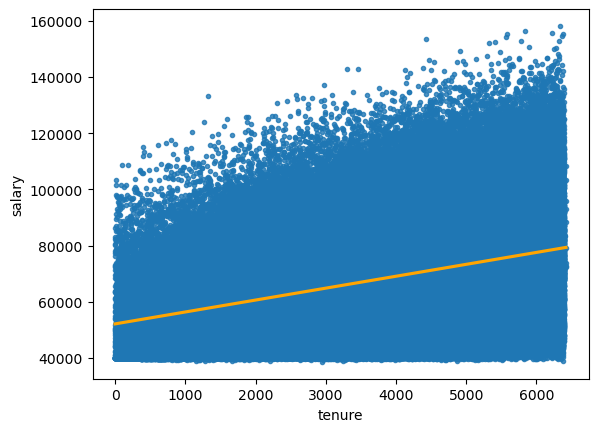

In [118]:
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws=dict(color='orange'))
plt.show()

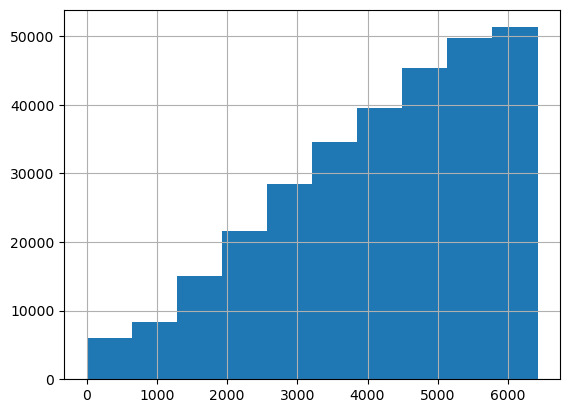

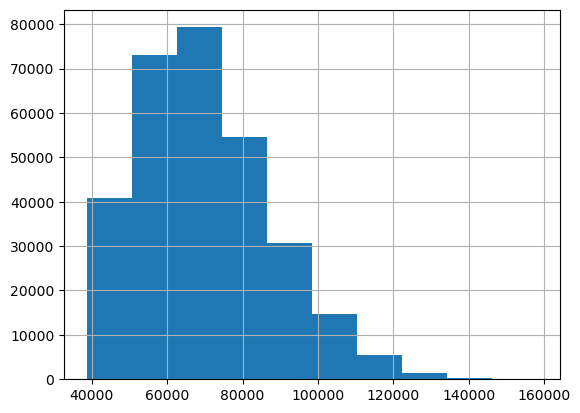

In [119]:
tenure_df.tenure.hist()
plt.show()

tenure_df.salary.hist()
plt.show()

In [120]:
r,p = stats.shapiro(tenure_df.tenure)
eval_dist(r,p)

The data is NOT normally distributed


In [121]:
r,p = stats.shapiro(tenure_df.salary)
eval_dist(r,p)

The data is NOT normally distributed


In [122]:
r,p = stats.spearmanr(df.tenure, df.salary)
r,p

(0.3752474702658628, 0.0)

In [123]:
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.375247.
P-value: 0.0


### b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [124]:
# H0: There is no correlation between tenure and number of titles
# Ha: There is a correlation between tenure and number of titles

In [125]:
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''

In [126]:
df = pd.read_sql(query, emp_url)

In [127]:
df.head()

,emp_no,num_titles,tenure
0,10001,1,13623
1,10002,1,9932
2,10003,1,10176
3,10004,2,13465
4,10005,2,12449


In [128]:
titles_df = df[['num_titles', 'tenure']]

In [129]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   num_titles  240124 non-null  int64
 1   tenure      240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


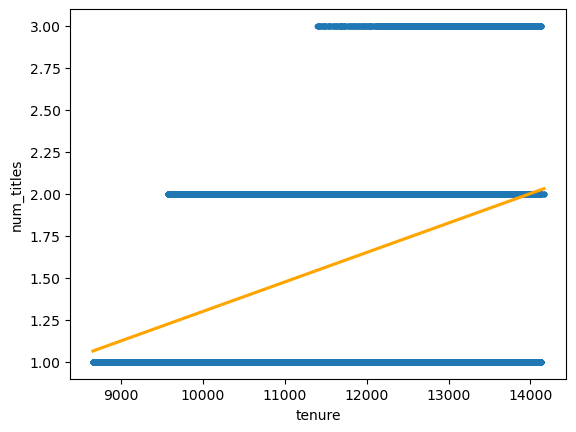

In [130]:
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

Because the number of titles is a discrete value, we should run an ANOVA or a Kruskal Wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc

In [131]:
# check for equal variance

stats.levene(titles_df.num_titles, titles_df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

Class notes: The value of the statistic tends to be high when there is a large difference in variances.
If the p-value is “small” - that is, if there is a low probability of sampling data from distributions with identical variances that produces such an extreme value of the statistic - this may be taken as evidence against the null hypothesis in favor of the alternative: the variances of the groups are not equal.

In [132]:
titles_df.num_titles.value_counts()

2    125345
1    111892
3      2887
Name: num_titles, dtype: int64

The variances are significantly different; therefore we will use the Kruskal Wallis test.

In [133]:
# run stats test: 
stats.kruskal(titles_df.num_titles, titles_df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

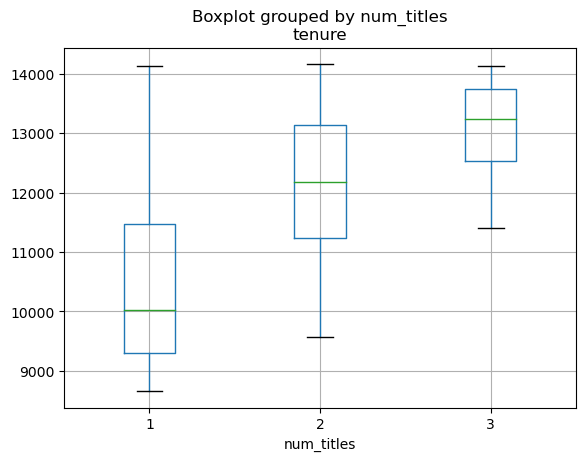

In [134]:
titles_df.boxplot('tenure', by='num_titles')
plt.show()

### 4. Use the sleepstudy data

In [135]:
from pydataset import data

In [136]:
df = data('sleepstudy')

In [137]:
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


### a. Is there a relationship between days and reaction time?

In [138]:
# H0: : There is no correlation between days and reaction time
# Ha: There is a correlation between days and reaction time

In [139]:
react_df = df[['Reaction', 'Days']]

In [140]:
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [141]:
react_df.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


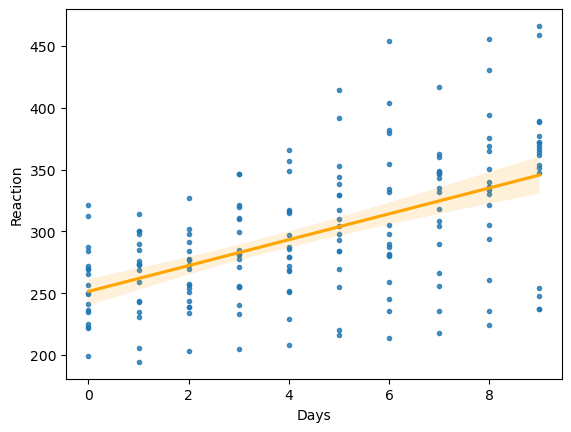

In [142]:
sns.regplot(x='Days', y='Reaction', data=react_df, marker='.', line_kws=dict(color='orange'))
plt.show()

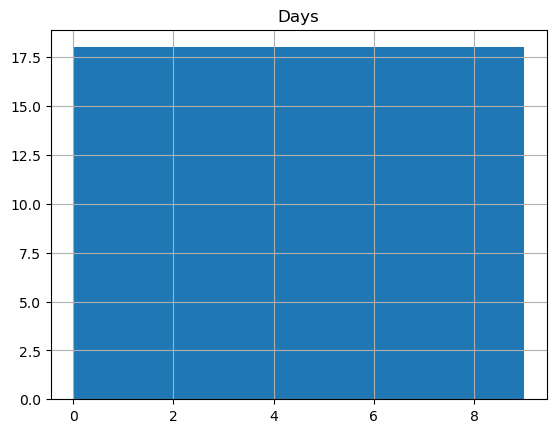

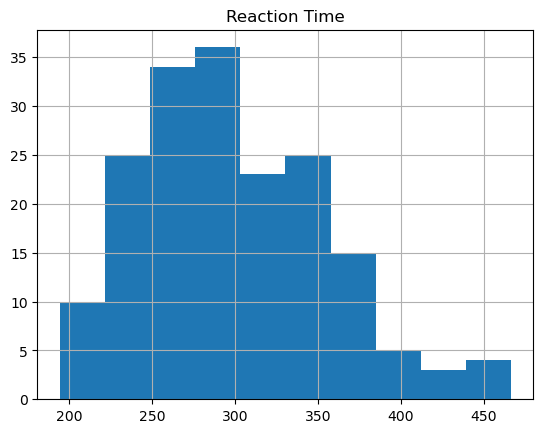

In [143]:
react_df.Days.hist()
plt.title('Days')
plt.show()

react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [144]:
r,p = stats.shapiro(react_df.Days)
eval_dist(r,p)

The data is NOT normally distributed


In [145]:
r,p = stats.shapiro(react_df.Reaction)
eval_dist(r,p)

The data is NOT normally distributed


In [146]:
r,p = stats.spearmanr(react_df.Days, react_df.Reaction)
r,p

(0.5228138502259547, 5.132878057706873e-14)

In [147]:
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.522814.
P-value: 5.132878057706873e-14


# Comparison of Means

### Question 1: Answer with the type of test you would use (assume normal distribution):

#### a. Is there a difference in grades of students on the second floor compared to the grades of all students?

In [148]:
# One-sample mean vs Population mean:
# One-sample T-test
# 2-tailed test

#### b. Are adults who drink milk taller than adults who don't drink milk?

In [149]:
# Compare two-samples means
# Independet T-test
# 1-tailed test

#### c. Is the price of gas higher in Texas or in New Mexico?

In [150]:
# Compare two-sample means
# 1-tailed test

#### d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [151]:
# Anova test

### Question 2: 
#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [152]:
# 2-tailed test
# two sample t-test scipy.stats.ttest_ind

$H_O$: Mean of average time for office one != mean of average time for office two <br>
$H_a$: Mean of average time for office one = mean of average time for office two

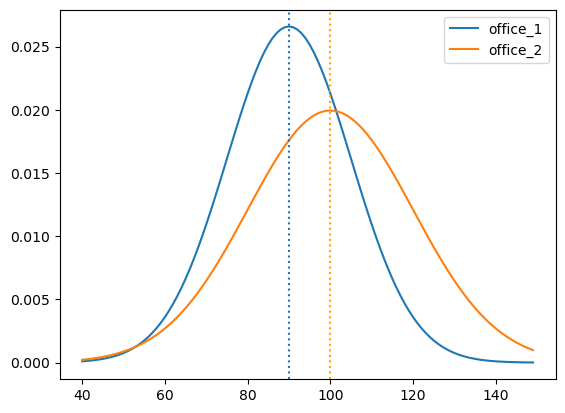

In [167]:
#plot the distributions
x = np.arange(40, 150)

y1 = stats.norm(90,15).pdf(x) #graphing office_1
y2 = stats.norm(100,20).pdf(x) #graphing office_2

plt.plot(x, y1, label='office_1')
plt.plot(x, y2, label='office_2')


plt.axvline(90, ls=":")
plt.axvline(100, ls=":", color='orange')

plt.legend()
plt.show()

In [154]:
# need to make the dataframe with the given parmeters
one = np.random.normal(90, 15, 40)
two = stats.norm(100, 20).rvs(50)

In [153]:
office_one_size = 40
office_one_mean = 90
office_one_std = 15

office_two_size = 50
office_two_mean = 100
office_two_std = 20


In [173]:
one.mean()

93.09386017021022

In [178]:
one_mean = one.mean()
two_mean = two.mean()
one_mean, two_mean

(93.09386017021022, 97.3485175514363)

In [180]:
# are the more than 30?
len(one), len(two)

(40, 50)

In [181]:
# variance
one.var(), two.var()

(173.09960151514287, 456.25088464395975)

In [177]:
# check the variance:
s, p = stats.levene(one, two)
p

0.014798516375635177

In [158]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
alpha = 0.05
if p < 0.05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

we cannot assume equal variances


In [159]:
t, p = stats.ttest_ind(one, two, equal_var=False)
t, p

(-1.1474085417463198, 0.12725237904746303)

In [183]:
if p < alpha:
    print('We reject the null_hypothesis')
else: 
    print('We fail to reject the null_hypothesis')

We reject the null_hypothesis


This means that the mean of average time for office one != mean of average time for office two.

### Question 3: Load the mpg dataset and use it to answer the following questions:

In [186]:
# use the harmonic mean to make it more real world

In [185]:
mpg = data('mpg')
mpg['average_fuel'] = stats.hmean(mpg[['cty', 'hwy']], axis= 1)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_fuel
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727


In [162]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  average_fuel  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


#### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H_0$ = mean of fuel-efficiency in cars from 2008 != mean of fuel-efficeincy in cars from 1999 <br>
$H_a$ = mean of fuel-efficiency in cars from 2008 = mean of fuel-efficiency in cars from 2008

In [189]:
# comparing two groups
cars_2008 = mpg[mpg.year == 2008].average_fuel
cars_1999 = mpg[mpg.year == 1999].average_fuel

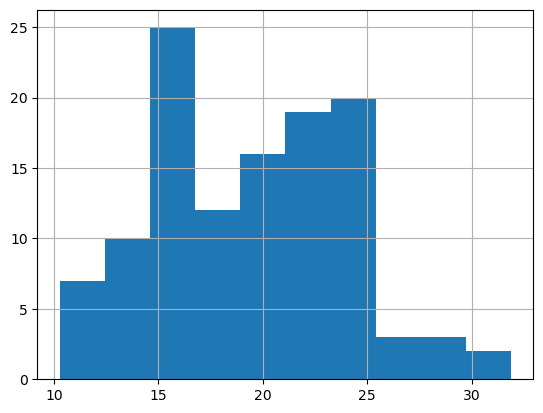

In [191]:
cars_2008.hist();

<Axes: >

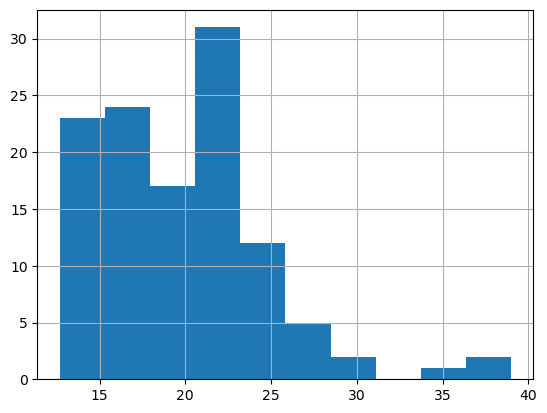

In [192]:
cars_1999.hist()

In [193]:
mean_a = cars_1999.mean()
mean_b = cars_2008.mean()

In [196]:
alpha = 0.05

In [203]:
# check variance
import scipy.stats as stats
stats, pval = stats.levene(cars_2008, cars_1999)
pval

0.8602339200830025

In [204]:
if pval < 0.05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

we will assume equal variances


In [209]:
import scipy.stats as stats
t, p = stats.ttest_ind(cars_1999, cars_2008)
t,p

(0.3011962975077886, 0.7635345888327115)

In [211]:
p < 0.05

False

In [212]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



#### b. Are compact cars more fuel-efficient than the average car?

In [217]:
#Let's create a dataset for only compact car mileage
compact_fuel = mpg[mpg['class'] == 'compact'].average_fuel

#Let's create a dataset for overall mileage
overall_fuel = mpg.average_fuel.mean()

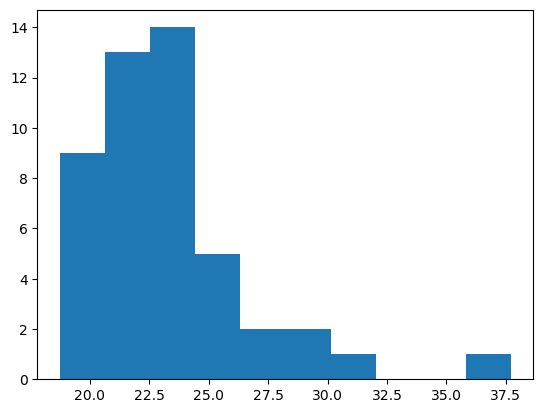

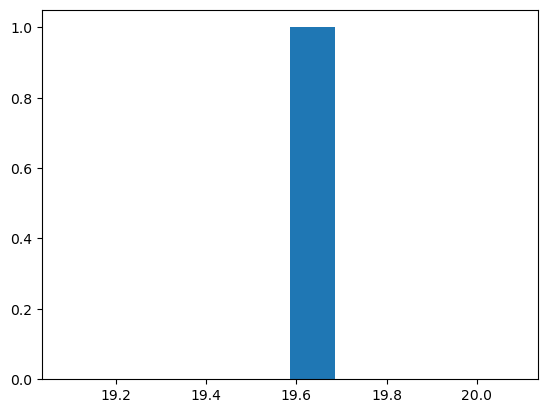

In [218]:
plt.hist(compact_fuel)
plt.show()

plt.hist(overall_fuel)
plt.show()

In [219]:
t,p = stats.ttest_1samp(compact_fuel, overall_fuel)

In [222]:
if (t > 0) and ((p/2) < alpha):
    print('we can reject the null hypothesis')

we can reject the null hypothesis


In [221]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there is no difference in fuel-efficiency between compact cars and the overall average.



#### c. Do manual cars get better gas mileage than automatic cars?

In [224]:
manual_fe = mpg[mpg.trans.str.contains('manual')].average_fuel
auto_fe = mpg[mpg.trans.str.contains('auto')].average_fuel

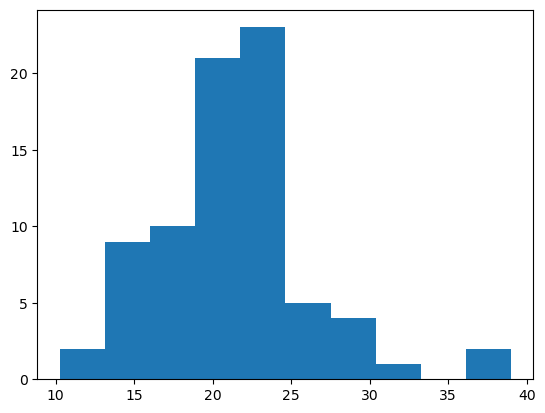

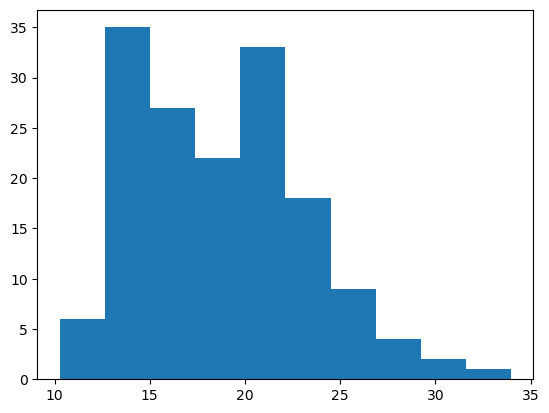

In [225]:
plt.hist(manual_fe)
plt.show()

plt.hist(auto_fe)
plt.show()

In [226]:
manual_fe.count(), auto_fe.count()

(77, 157)

In [227]:
t,p = stats.levene(manual_fe, auto_fe)

In [228]:
p < alpha

False

In [229]:
t,p = stats.ttest_ind(manual_fe, auto_fe, equal_var=False)
t,p

(4.47444321386703, 1.5980702702079528e-05)

In [231]:
if (t > 0) and ((p/2) < alpha):
    print('We can reject our null hypothesis')
else:
    print('we cannot reject our null hypothesis')

We can reject our null hypothesis


## Functions

In [1]:
def chi2_test(table, variables=False):
    """
    """
    chi2, p, defg, expected = stats.chi2_contingency(table)
    print(f'''Observed:
{observed5.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

    if variables:
        return chi2, p, defg, expected
    else:
        return

In [2]:
def eval_dist(r, p, α=0.05):
    """
    This function will take in:
    - r: the test statistic
    - p: p-value
    - α: id defaulted to 5%
    and print out if the data used to create r & p from the stats.shapiro test is normally distributed.
    """
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [3]:
def eval_Pearsonresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

In [4]:
def eval_Spearmanresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")